In [1]:
from DenseNet import densenet
from label2onehot import label2onehot
from onehot2label import onehot2label
from label_dict import label_dict
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

/opt/conda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Use GPU
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 4} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [5]:
x = np.load('train_resize.npy')/255.
y = np.load('train.npy')

In [6]:
onehot_y = label2onehot(y[:, 0], 256)

In [7]:
densemodel = densenet(x.shape[1:], 256, 64, 32, eve_layers=(6, 12, 24, 16), num_denseblock=4, dropout_rate=0.2, weight_decay=1e-4)

In [10]:
densemodel.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = densemodel.fit(x, onehot_y, epochs=80, batch_size=64, validation_split=0.25)

Train on 17868 samples, validate on 5956 samples
Epoch 1/80
17868/17868 [==============================] - 100s 6ms/step - loss: 10.0201 - acc: 0.0842 - val_loss: 10.6250 - val_acc: 0.0195
Epoch 2/80
17868/17868 [==============================] - 82s 5ms/step - loss: 7.5483 - acc: 0.1347 - val_loss: 7.2675 - val_acc: 0.0861
Epoch 3/80
17868/17868 [==============================] - 82s 5ms/step - loss: 6.0087 - acc: 0.1780 - val_loss: 7.3521 - val_acc: 0.0507
Epoch 4/80
17868/17868 [==============================] - 84s 5ms/step - loss: 5.0368 - acc: 0.2262 - val_loss: 6.3461 - val_acc: 0.0917
Epoch 5/80
17868/17868 [==============================] - 84s 5ms/step - loss: 4.4045 - acc: 0.2790 - val_loss: 5.5289 - val_acc: 0.1486
Epoch 6/80
17868/17868 [==============================] - 83s 5ms/step - loss: 4.0090 - acc: 0.3195 - val_loss: 5.6349 - val_acc: 0.1274
Epoch 7/80
17868/17868 [==============================] - 81s 5ms/step - loss: 3.7064 - acc: 0.3614 - val_loss: 5.7918 - val_a

17868/17868 [==============================] - 81s 5ms/step - loss: 1.4753 - acc: 0.8944 - val_loss: 4.9207 - val_acc: 0.4139
Epoch 61/80
17868/17868 [==============================] - 81s 5ms/step - loss: 1.4297 - acc: 0.9072 - val_loss: 5.7499 - val_acc: 0.3407
Epoch 62/80
17868/17868 [==============================] - 81s 5ms/step - loss: 1.4668 - acc: 0.8960 - val_loss: 4.8744 - val_acc: 0.4142
Epoch 63/80
17868/17868 [==============================] - 80s 4ms/step - loss: 1.4810 - acc: 0.8947 - val_loss: 4.8071 - val_acc: 0.3988
Epoch 64/80
17868/17868 [==============================] - 80s 4ms/step - loss: 1.4636 - acc: 0.8990 - val_loss: 5.0701 - val_acc: 0.3831
Epoch 65/80
17868/17868 [==============================] - 81s 5ms/step - loss: 1.4298 - acc: 0.9062 - val_loss: 6.1496 - val_acc: 0.3032
Epoch 66/80
17868/17868 [==============================] - 80s 4ms/step - loss: 1.4687 - acc: 0.8924 - val_loss: 5.0884 - val_acc: 0.4055
Epoch 67/80
17868/17868 [=====================

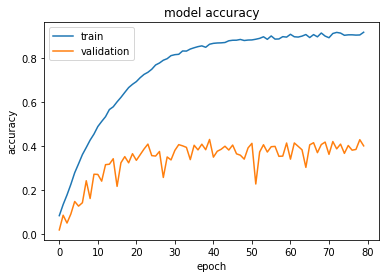

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

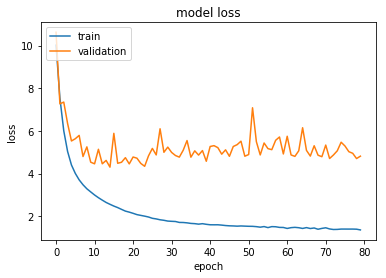

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [10]:
onehot_y.shape

(23824, 256)

In [11]:
a = onehot2label(onehot_y)

In [12]:
a[1][0] 

250.0

In [7]:
X_test = np.load('test_resize.npy')
Y_test = np.load('test.npy')

In [8]:
y_test = label2onehot(Y_test[:, 0], 256)

In [11]:
#evaluate
eva = densemodel.evaluate(X_test, y_test, batch_size=32, verbose=1, sample_weight=None)
print()
print("Loss = " + str(eva[0]))
print("Test Accuracy = " + str(eva[1]))

5956/5956 [==============================] - 15s 2ms/step
()
Loss = 17.100486107205608
Test Accuracy = 0.0036937541974479517


This image is: goat


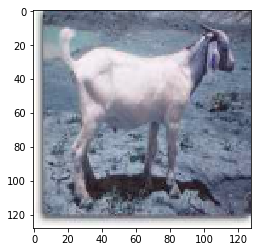

In [16]:
predict_num = 100
dict_label = label_dict()
X_predict = X_test[predict_num]
print('This image is: ' + dict_label[Y_test[:, 0][predict_num]+1])
plt.imshow(X_predict)

In [17]:
#predict
predict_vector = densemodel.predict(np.expand_dims(X_predict, axis=0))
index = np.where(predict_vector[0] == np.max(predict_vector[0]))

In [18]:
print('This image is: ' + dict_label[index[0][0]+1])

This image is: praying-mantis


In [20]:
densemodel.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
first_conv2D (Conv2D)           (None, 64, 64, 64)   9408        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 32, 32, 64)   0           first_conv2D[0][0]               
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 64)   256         max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
activation

                                                                 dropout_54[0][0]                 
                                                                 dropout_56[0][0]                 
                                                                 dropout_58[0][0]                 
                                                                 dropout_60[0][0]                 
                                                                 dropout_62[0][0]                 
                                                                 dropout_64[0][0]                 
                                                                 dropout_66[0][0]                 
                                                                 dropout_68[0][0]                 
                                                                 dropout_70[0][0]                 
                                                                 dropout_72[0][0]                 
          

In [21]:
densemodel.save_weights('DenseNet-121.hdf5')

In [6]:
densemodel.load_weights('DenseNet-121.hdf5', by_name=False)